<a href="https://colab.research.google.com/github/spongtarakulpanit/MPM_200_Pongtarakulpanit/blob/main/notebooks/MPM200_Session5_HW_SPongtarakulpanit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [ ]:
install.packages('beepr') #install the beepr package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘audio’




In [ ]:
library(beepr) #loading beepr into my workspace

In [ ]:
#?beep() #to check the manual for this package

In [ ]:
beep(sound = 8, expr = NULL) #the sound cannot be play due to no audio drivers are available

Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

In [ ]:
install.packages('tidyverse') #install the tidyverse package. there was a warning when T in Tidyverse is a capital letter, suggest using t instead.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
install.packages('dplyr') #install the dplyr package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)

In [ ]:
install.packages('ggplot2') #install the ggplot2 package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)

In [ ]:
install.packages('sjPlot') #install the sjPlot package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




In [ ]:
library(sjPlot)


Attaching package: ‘sjPlot’


The following object is masked from ‘package:ggplot2’:

    set_theme




## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [ ]:
#read the csv file and
#data = Hummingbird_data.csv

In [ ]:
Hummingbird_data = read.csv('/content/Hummingbird_data.csv') #the current working directory

In [ ]:
colnames(Hummingbird_data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

In [ ]:
ncol(Hummingbird_data)

[1] 12

In [ ]:
nrow(Hummingbird_data)

[1] 6908

**Q2. How many rows and columns are in the datafame**  
1 point

In [ ]:
## your code answer here
## ncol(Hummingbird_data) and nrow(Hummingbird_data)

## 6908 rows and 12 columns

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [ ]:
str(Hummingbird_data)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [ ]:
# Identify data types of each column
data_types = sapply(Hummingbird_data, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


In [ ]:
?sapply()

In [ ]:
## Admitted column should be 'Date'
## Disposition_binary, Place, F_Aid, Species_e, Sex_e, Age_e, season, and Green_Orange should be 'Factor'

Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [ ]:
library(dplyr)
model_data = sample_n(Hummingbird_data, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

In [ ]:
nrow(model_data)

[1] 5000

In [ ]:
ncol(model_data)

[1] 12

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

In [ ]:
# 5000 rows and 12 columns

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

In [ ]:
# 11 categorical variables and 1 continuous variable in this dataset

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [ ]:
write.csv(model_data, "/content/Hummingbird_data_Siripatsorn.csv")

In [ ]:
getwd()

[1] "/content"

In [ ]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [ ]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4129
Santa Barbara,75
malibu,796


In [ ]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [ ]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

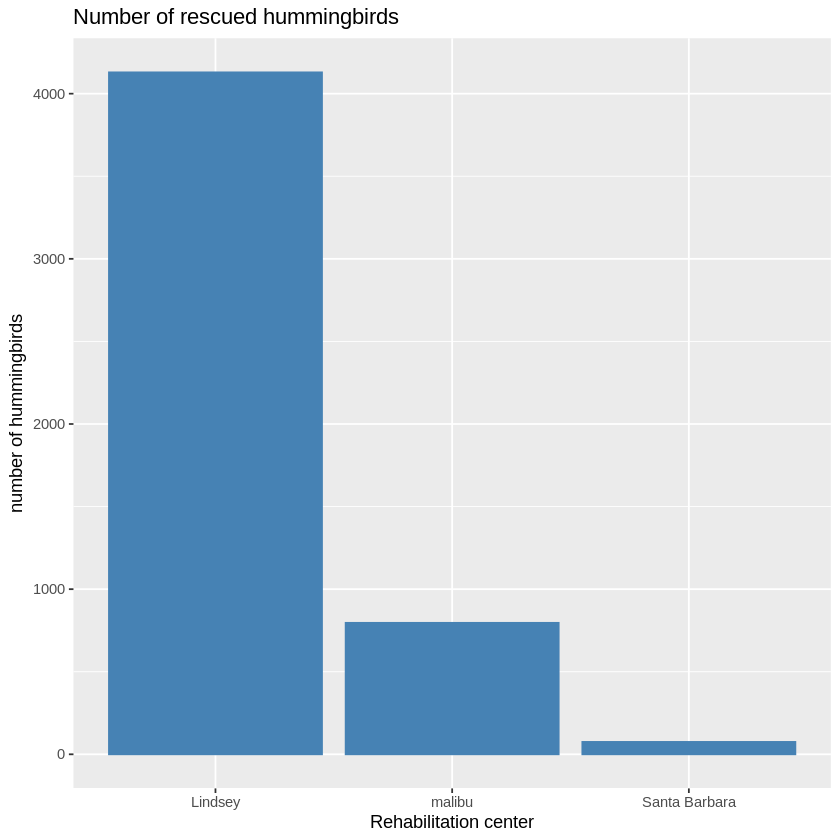

In [ ]:
p

In [ ]:
ggsave("hummingbirds_plot.pdf", plot = p, width = 4, height = 3, units = "in", dpi = 300)

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

In [ ]:
rehab = model_data  %>% #Take model_data and do the following operations, then save the final result into rehab
group_by(Place)%>% #groups the data by the Place column
summarise(count = n_distinct(ID)) #creates a summary table with count as a new column, using Counts of the number of unique hummingbird IDs from each place

In [ ]:
p = ggplot(rehab, aes(x = Place, y = count)) + #creating a p ggplot using the rehab dataset with Place as X axis and Count as Y
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+ #modify the chart using the actual value of Count (Y) with steelblue border and fill the bar with also steelblue
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+ #lable X axis and Y axis
labs(title = "Number of rescued hummingbirds") #lable the title of the chart

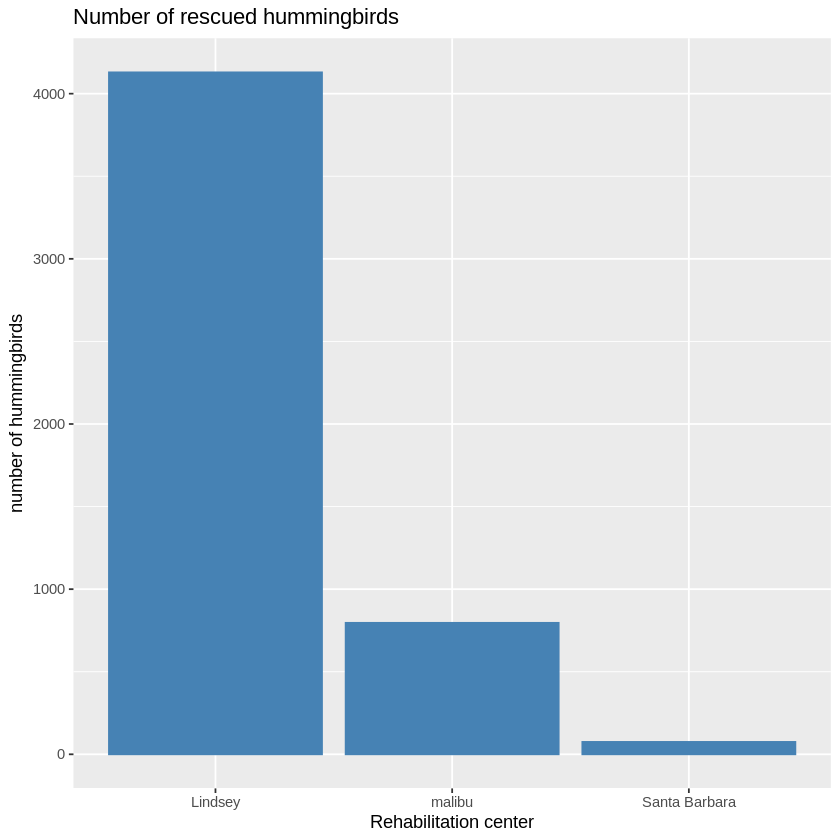

In [ ]:
p #plot the graph
ggsave("hummingbirds_plot.pdf", plot = p, width = 4, height = 3, units = "in", dpi = 300)
#save the graph called 'p' with the name of 'hummingbirds_plot' in pdf, with 4 inches width and 3 inches tall. dpi = 300

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

In [ ]:
# 5 covariates: Place, F_Aid, Age_e, season, r

In [ ]:
table_Place = model_data  %>%
group_by(Place, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_F_Aid = model_data  %>%
group_by(F_Aid, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_Age_e = model_data  %>%
group_by(Age_e, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_season = model_data  %>%
group_by(season, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_r = model_data  %>%
group_by(r, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'F_Aid'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'r'. You can override using the `.groups`
argument.


In [ ]:
table_Place;
table_F_Aid;
table_Age_e;
table_season;
table_r;

Place,Disposition_binary,count
<chr>,<chr>,<int>
Lindsey,Died,2665
Lindsey,Released,1464
Santa Barbara,Died,43
Santa Barbara,Released,32
malibu,Died,510
malibu,Released,286


F_Aid,Disposition_binary,count
<chr>,<chr>,<int>
No,Died,2114
No,Released,1180
Yes,Died,1104
Yes,Released,602


Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,446
Nestling,Released,756
adult-like,Died,2772
adult-like,Released,1026


season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,378
Fall,Released,59
Spring,Died,1348
Spring,Released,943
Summer,Died,942
Summer,Released,592
Winter,Died,550
Winter,Released,188


r,Disposition_binary,count
<chr>,<chr>,<int>
caught by domestic animal,Died,475
caught by domestic animal,Released,182
found inside,Died,118
found inside,Released,39
found on the ground,Died,1419
found on the ground,Released,735
nest-related,Died,269
nest-related,Released,406
suspect torpor-like state,Died,89


In [ ]:
a = ggplot(table_Place, aes(x = Place, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(. ~ Disposition_binary)+ coord_flip() +
  xlab("Place") + ylab("Number of hummingbirds") +
  labs(title = "Number of hummingbirds by Place and Disposition")

b = ggplot(table_F_Aid, aes(x = F_Aid, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(. ~ Disposition_binary)+ coord_flip() +
  xlab("F_Aid") + ylab("Number of hummingbirds") +
  labs(title = "Number of hummingbirds by F_Aid and Disposition")

c = ggplot(table_Age_e, aes(x = Age_e, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(. ~ Disposition_binary)+ coord_flip() +
  xlab("Age_e") + ylab("Number of hummingbirds") +
  labs(title = "Number of hummingbirds by Age_e and Disposition")

d = ggplot(table_season, aes(x = season, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(. ~ Disposition_binary)+ coord_flip() +
  xlab("season") + ylab("Number of hummingbirds") +
  labs(title = "Number of hummingbirds by season and Disposition")

e = ggplot(table_r, aes(x = r, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(. ~ Disposition_binary)+ coord_flip() +
  xlab("r") + ylab("Number of hummingbirds") +
  labs(title = "Number of hummingbirds by r and Disposition")

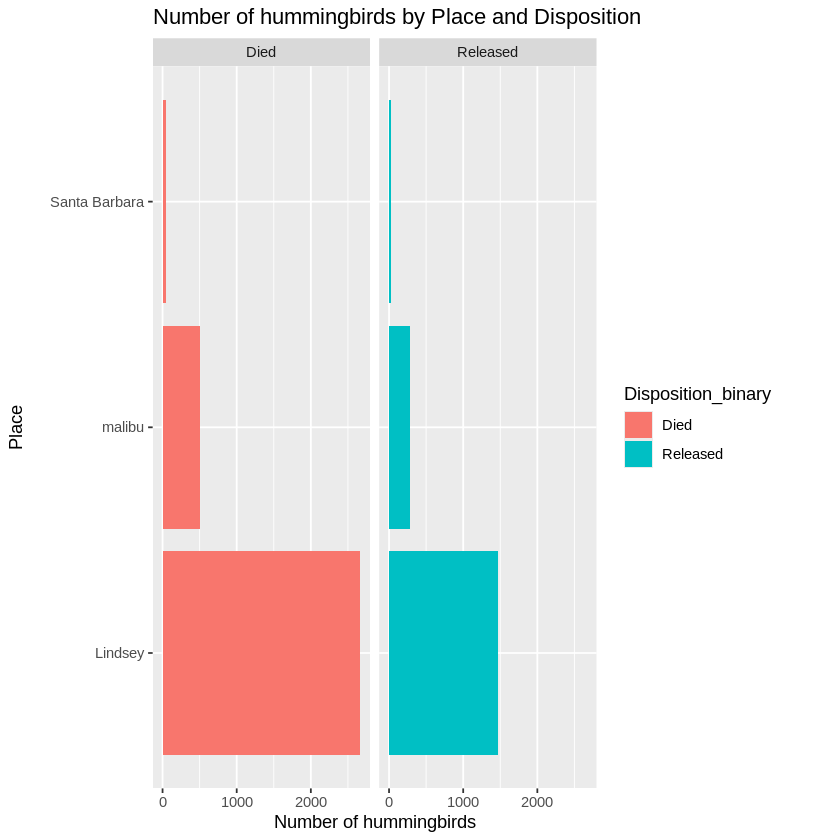

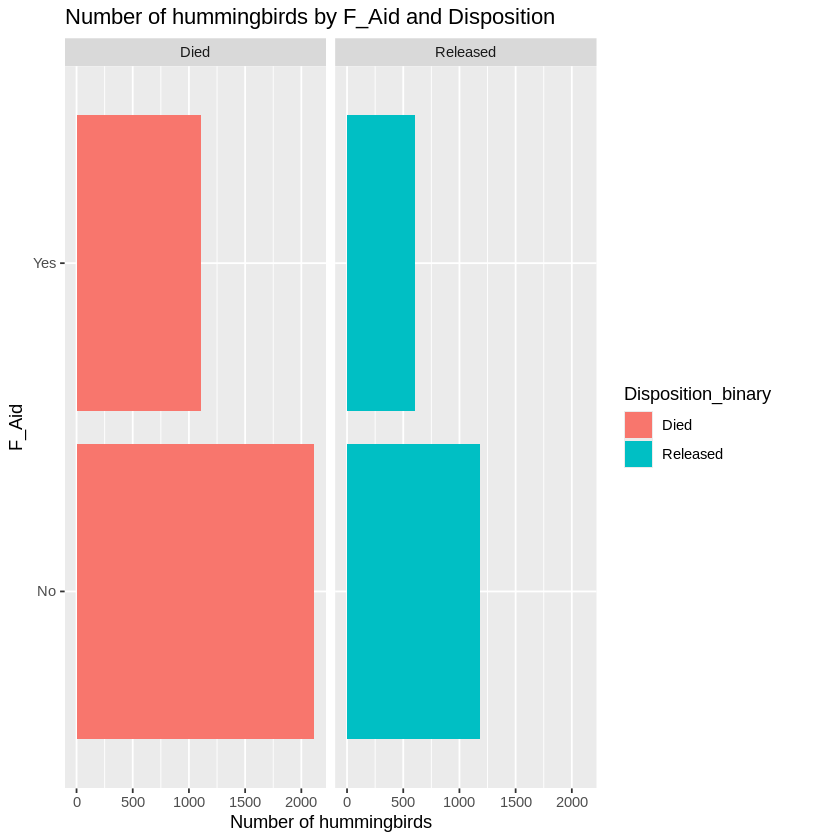

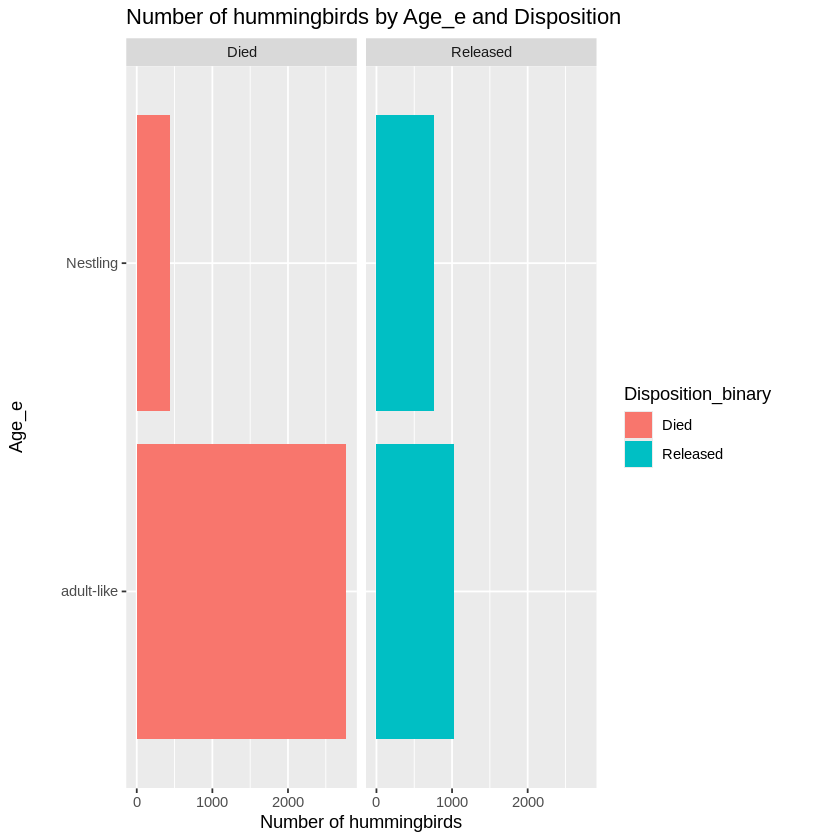

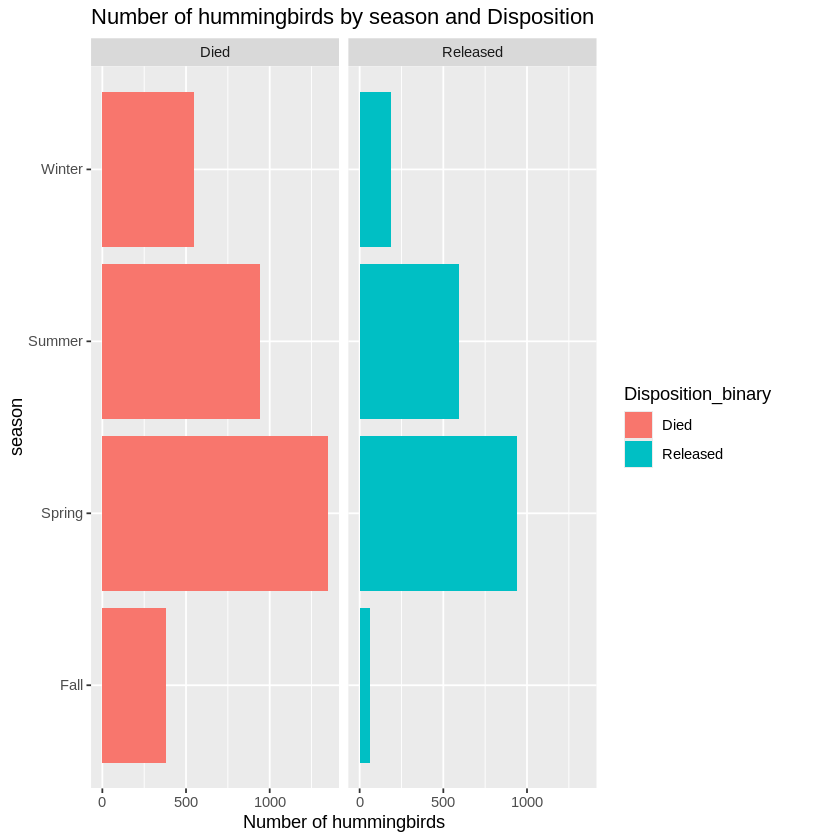

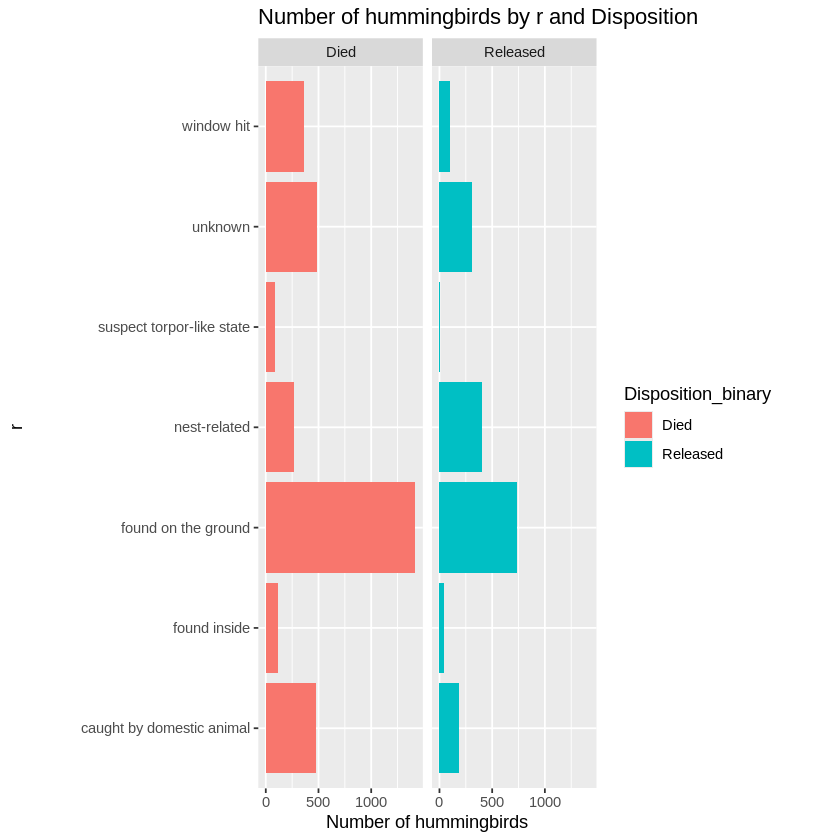

In [ ]:
a;
b;
c;
d;
e;


In [ ]:
#a + facet_grid(. ~ FACET_Disposition_binary)+ coord_flip()

In [ ]:
## Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?
## Answer: Most of the covariates show visual evidence of association with final disposition (Died vs Released).
## The strongest patterns appear in: Season, Age_e, and r (Place and F_Aid likely matter as well, but visuals alone can’t distinguish)
## Suggest Logistic Regression

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


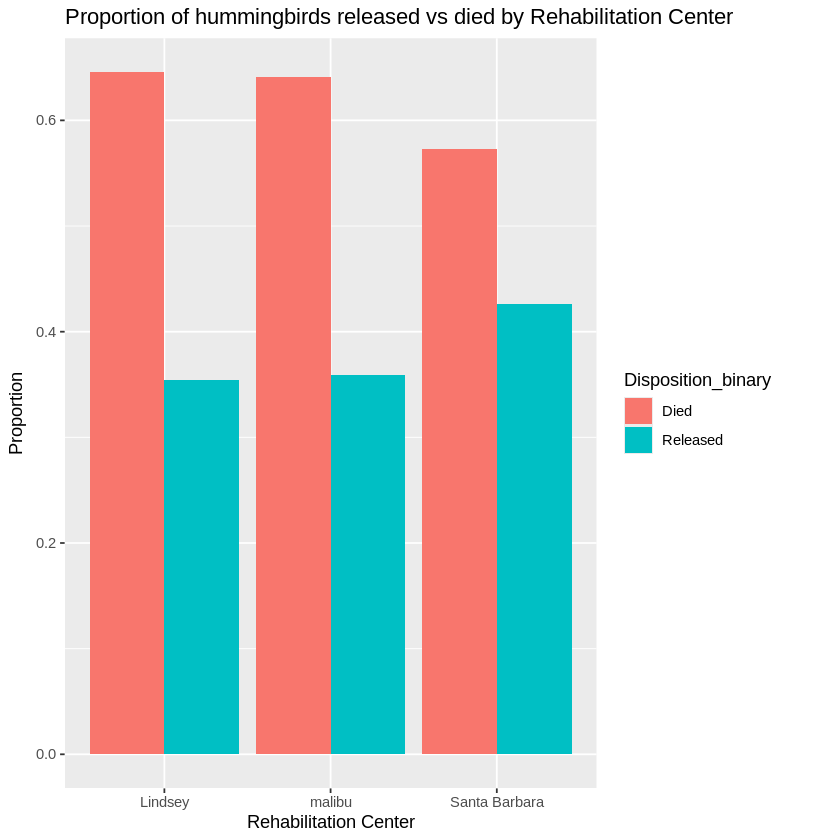

In [ ]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("Proportion") +
  labs(title = "Proportion of hummingbirds released vs died by Rehabilitation Center")

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

In [ ]:
table(model_data$Species_group)

< table of extent 0 >

In [ ]:
model_data$Species_group = ifelse(
  model_data$Species_e %in% c("ANHU", "BCHU", "Non-selasphorus"),
  "Non-selasphorus", "Selasphorus")

In [ ]:
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


In [ ]:
Species_table = ggplot(species_distribution, aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of Hummingbirds") +
  labs(title = "Survival of Hummingbirds by Species Group")

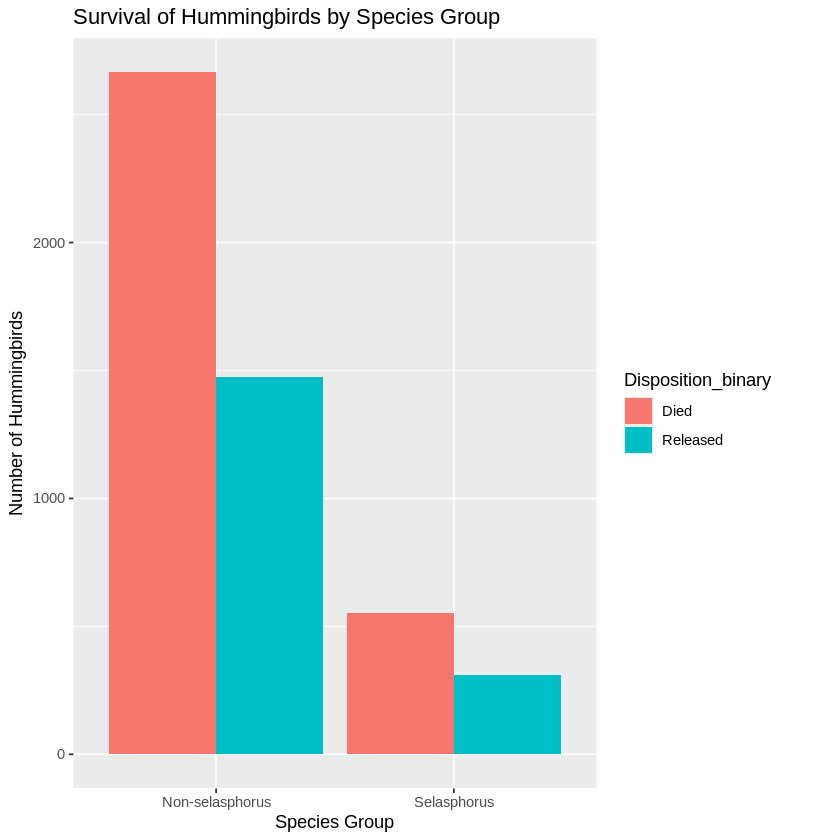

In [ ]:
Species_table

In [ ]:
## Analysis
## From the graphs, Non-Selasphorus (ANHU, BCHU, and Non-selasphorus) has a higher numnber of both Died and Released compared to Selasphorus; however, the survival rates look approximately the same.

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [ ]:
#model_data$Admitted_date = as.Date(___________, format = "%m/%d/%Y")

In [ ]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

Q12a Please explain the argument `format` in code above

In [ ]:
#Formatted 'Admitted' data into 'Admitted_date' using the data from model_data into Month/Date/Year in the new column.

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [ ]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))

In [ ]:
admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

Finally, we can use `ggplot` to plot these timelines.

In [ ]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Month") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Hummingbird Admissions by Month")

In [ ]:
# Plot admissions by year
p_year = ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Year") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Hummingbird Admissions by Year")

In [ ]:
## Plot similar timeline for Yearly admissions of Hummingbirds

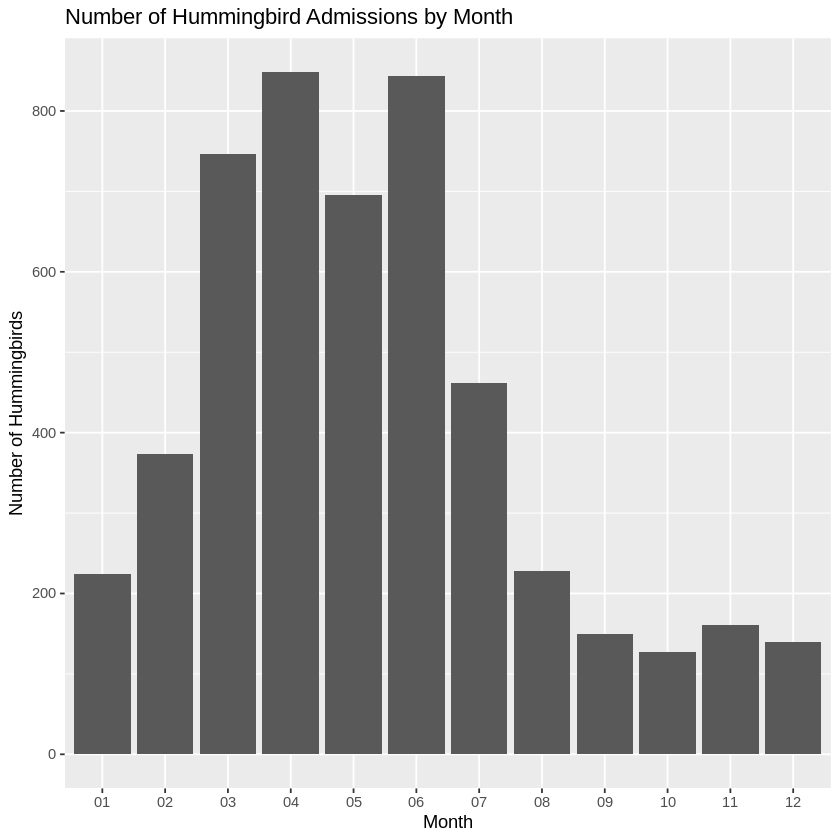

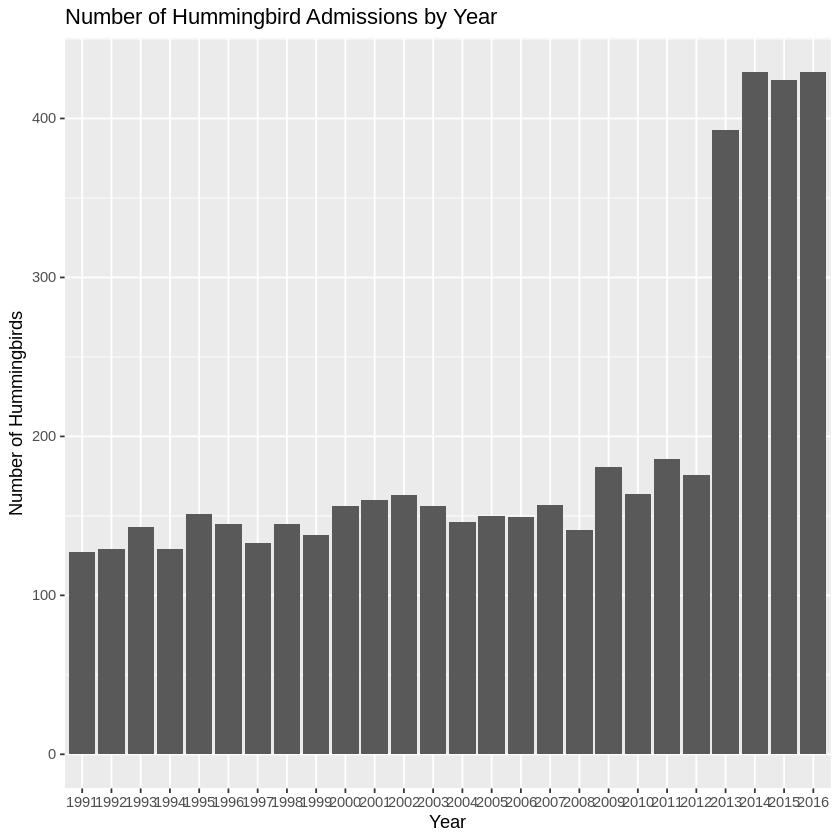

In [ ]:
p_month;
p_year;

In [ ]:
## For the session 8

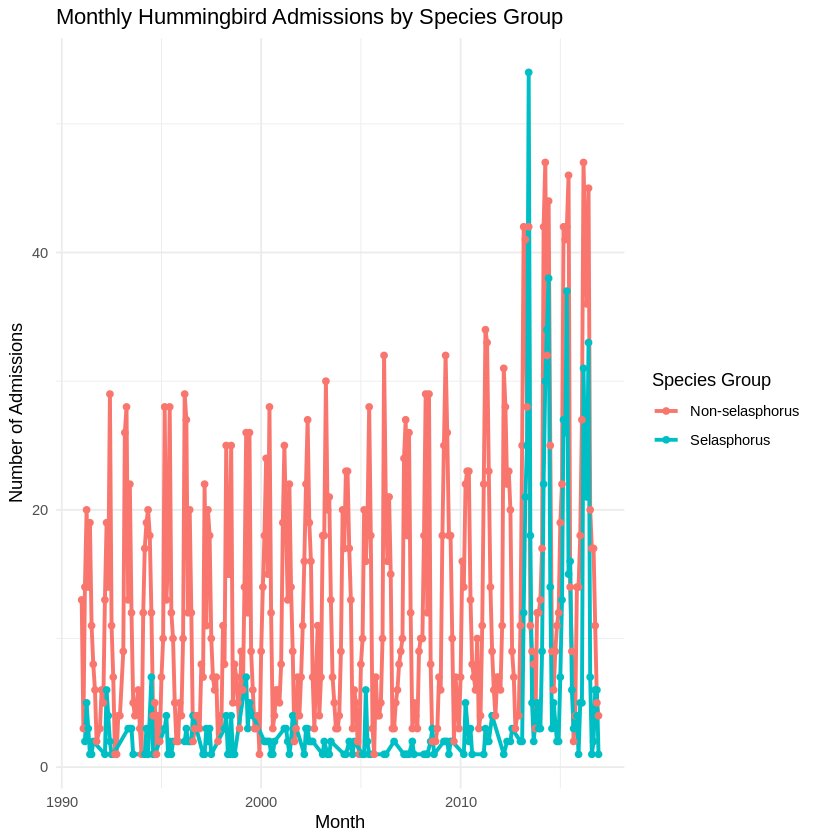

In [ ]:
# Convert to date format (adjust column name if needed)
model_data = model_data %>%
  mutate(
    Admitted_date = as.Date(Admitted_date, format = "%m/%d/%Y"),
    Month = floor_date(Admitted_date, "month")   # Extract monthly period
  )

# Summarize monthly admissions by species group
monthly_admissions = model_data %>%
  group_by(Month, Species_group) %>%
  summarise(count = n(), .groups = "drop")

# Timeline plot
ggplot(monthly_admissions, aes(x = Month, y = count, color = Species_group)) +
  geom_line(size = 1.1) +
  geom_point() +
  labs(
    title = "Monthly Hummingbird Admissions by Species Group",
    x = "Month",
    y = "Number of Admissions",
    color = "Species Group"
  ) +
  theme_minimal()

In [ ]:
## From Session 8

In [ ]:
##Section 4: Running full model and model selection

model_data$Disposition_binary = ifelse(model_data$Disposition_binary == "Release", 1, 0)

fullmodel = glm(Disposition_binary ~ r + Green_Orange + season + F_Aid + Species_e,
                data = model_data,
                family = binomial(link = "logit"))
fullmodel

Warning message:
“glm.fit: algorithm did not converge”



Call:  glm(formula = Disposition_binary ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = "logit"), data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                  -2.657e+01                     2.522e-14  
        rfound on the ground                 rnest-related  
                   3.190e-14                     4.896e-14  
  rsuspect torpor-like state                      runknown  
                   2.512e-14                     3.025e-14  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                   2.489e-14                    -4.733e-16  
                seasonSpring                  seasonSummer  
                  -1.282e-16                    -1.711e-14  
                seasonWinter                      F_AidYes  
                  -7.078e-15                     1.041e-15  
               Species_eBCHU      Species_eNon-selasphorus  
                   2.905e-16               

In [ ]:
summary(fullmodel)


Call:
glm(formula = Disposition_binary ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = "logit"), data = model_data)

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)
(Intercept)                  -2.657e+01  2.108e+04  -0.001    0.999
rfound inside                 2.522e-14  3.173e+04   0.000    1.000
rfound on the ground          3.190e-14  1.607e+04   0.000    1.000
rnest-related                 4.896e-14  2.157e+04   0.000    1.000
rsuspect torpor-like state    2.512e-14  3.866e+04   0.000    1.000
runknown                      3.025e-14  1.928e+04   0.000    1.000
rwindow hit                   2.489e-14  2.175e+04   0.000    1.000
Green_OrangeSelasphorus spp. -4.733e-16  1.446e+04   0.000    1.000
seasonSpring                 -1.282e-16  1.906e+04   0.000    1.000
seasonSummer                 -1.711e-14  1.974e+04   0.000    1.000
seasonWinter                 -7.078e-15  2.167e+

In [ ]:
backward_model = step(fullmodel,k=2,direction = "backward",test="Chisq")

Start:  AIC=28
Disposition_numeric ~ r + Green_Orange + season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=28
Disposition_numeric ~ r + season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- r          6 2.9008e-08  16   0        1
- season     3 2.9008e-08  22   0        1
- Species_e  3 2.9008e-08  22   0        1
- F_Aid      1 2.9008e-08  26   0        1
<none>         2.9008e-08  28             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=16
Disposition_numeric ~ season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- season     3 2.9008e-08  10   0        1
- Species_e  3 2.9008e-08  10   0        1
- F_Aid      1 2.9008e-08  14   0        1
<none>         2.9008e-08  16             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=10
Disposition_numeric ~ F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- Species_e  3 2.9008e-08   4   0        1
- F_Aid      1 2.9008e-08   8   0        1
<none>         2.9008e-08  10             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=4
Disposition_numeric ~ F_Aid



Warning message:
“glm.fit: algorithm did not converge”


        Df   Deviance AIC LRT Pr(>Chi)
- F_Aid  1 2.9008e-08   2   0        1
<none>     2.9008e-08   4             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=2
Disposition_numeric ~ 1



In [ ]:
forward_model = step(fullmodel,k=2,direction = ,test="Chisq")

Start:  AIC=28
Disposition_numeric ~ r + Green_Orange + season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=28
Disposition_numeric ~ r + season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- r          6 2.9008e-08  16   0        1
- season     3 2.9008e-08  22   0        1
- Species_e  3 2.9008e-08  22   0        1
- F_Aid      1 2.9008e-08  26   0        1
<none>         2.9008e-08  28             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=16
Disposition_numeric ~ season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- season     3 2.9008e-08  10   0        1
- Species_e  3 2.9008e-08  10   0        1
- F_Aid      1 2.9008e-08  14   0        1
<none>         2.9008e-08  16             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=10
Disposition_numeric ~ F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- Species_e  3 2.9008e-08   4   0        1
- F_Aid      1 2.9008e-08   8   0        1
<none>         2.9008e-08  10             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=4
Disposition_numeric ~ F_Aid



Warning message:
“glm.fit: algorithm did not converge”


        Df   Deviance AIC LRT Pr(>Chi)
- F_Aid  1 2.9008e-08   2   0        1
<none>     2.9008e-08   4             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=2
Disposition_numeric ~ 1



In [ ]:
names(backward_model)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          
[31] "anova"

In [ ]:
## Q1: How many model properties are available?
## 31

In [ ]:
library(sjPlot)

tab_model(backward_model)

In [ ]:
## Q2: Which variable has the highest odds ratio for survival?
## rnest-related

## Q3: Do the calculated odds ratios match the values provided by sjPlot?
## Yes, they are the same